In [1]:
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体   
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

# 随机变量
连续随机变量的主要公共方法如下：
* rvs:随机变量（就是从这个分布中抽一些样本）
* pdf：概率密度函数。
* cdf：累计分布函数
* sf：残存函数（1-CDF）
* ppf：分位点函数（CDF的逆）
* isf：逆残存函数（sf的逆）
* stats:返回均值，方差，（费舍尔）偏态，（费舍尔）峰度。
* moment:分布的中心矩。

<IPython.core.display.Javascript object>


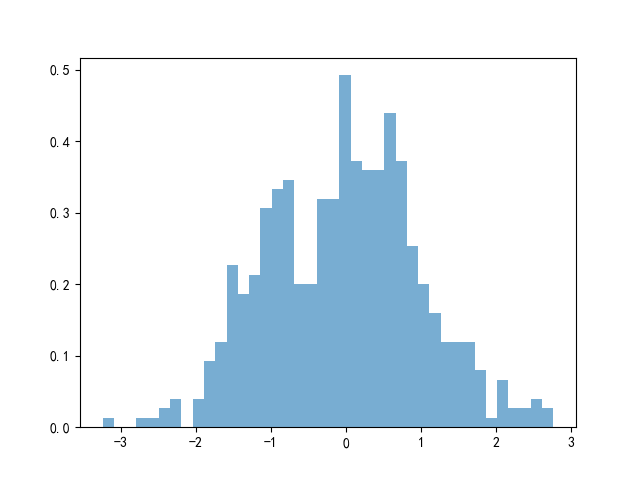

(array([0.01330355, 0.        , 0.        , 0.01330355, 0.01330355,
        0.0266071 , 0.03991065, 0.        , 0.03991065, 0.09312485,
        0.11973195, 0.22616034, 0.1862497 , 0.2128568 , 0.30598164,
        0.33258874, 0.34589229, 0.19955325, 0.19955325, 0.31928519,
        0.31928519, 0.49223134, 0.37249939, 0.35919584, 0.35919584,
        0.43901714, 0.37249939, 0.25276744, 0.19955325, 0.1596426 ,
        0.11973195, 0.11973195, 0.11973195, 0.0798213 , 0.01330355,
        0.06651775, 0.0266071 , 0.0266071 , 0.03991065, 0.0266071 ]),
 array([-3.24777077, -3.09743496, -2.94709914, -2.79676333, -2.64642751,
        -2.49609169, -2.34575588, -2.19542006, -2.04508424, -1.89474843,
        -1.74441261, -1.5940768 , -1.44374098, -1.29340516, -1.14306935,
        -0.99273353, -0.84239772, -0.6920619 , -0.54172608, -0.39139027,
        -0.24105445, -0.09071863,  0.05961718,  0.209953  ,  0.36028881,
         0.51062463,  0.66096045,  0.81129626,  0.96163208,  1.11196789,
         1.26230

In [3]:
# 定义标准正态分布
norm=stats.norm(loc=0,scale=1)
# 从标准正态分布中抽样
plt.figure()
plt.hist(x=norm.rvs(size=500),bins=40,density=True,alpha=.6)

In [4]:
# 获得指定变量值得概率密度值
norm.pdf(1.97)

0.05730378891911713

In [5]:
# 获得指定值得累积分布值
norm.cdf([-1.97,0,1.97])

array([0.02441919, 0.5       , 0.97558081])

In [6]:
# 获得残存函数值（1-cdf）
norm.sf([-1.97,0,1.97])

array([0.97558081, 0.5       , 0.02441919])

In [7]:
# 分位点数值
norm.ppf(0.5)

0.0

In [8]:
# 逆残存函数值
norm.isf(.05/2)

1.9599639845400545

In [9]:
# 返回均值，方差，（费舍尔）偏态，（费舍尔）峰度。
norm.stats(moments='mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [10]:
# 分布的中心距
norm.moment(2)

1.0

In [11]:
# 均值、标准差和方差
norm.mean(),norm.std(),norm.var()

(0.0, 1.0, 1.0)

# loc(偏移)、scale(缩放)

In [12]:
norm35=stats.norm(loc=3,scale=5)
norm35.stats(moments='mvsk')

(array(3.), array(25.), array(0.), array(0.))

In [13]:
norm35.mean(),norm35.std(),norm35.var()

(3.0, 5.0, 25.0)

# broadcasting(广播)

In [14]:
stats.t.ppf([.01,.5,.99],[[10],[11]])

array([[-2.76376946e+00,  6.80574793e-17,  2.76376946e+00],
       [-2.71807918e+00,  6.79036822e-17,  2.71807918e+00]])

In [15]:
stats.t.ppf([.01,.5,.99],[10,11,12])

array([-2.76376946e+00,  6.79036822e-17,  2.68099799e+00])

# 抽样

In [16]:
loc,scale,df,n=1,5,9,1000
xt=stats.t(loc=loc,scale=scale,df=df)
xn=stats.norm(loc=loc,scale=scale)
x=xt.rvs(size=n)

In [17]:
# 样本统计值
x.min(),x.max(),x.mean(),x.std(),x.var()

(-24.45616505561434,
 30.437221492260797,
 0.9475118451452057,
 5.8012521386384,
 33.65452637605661)

In [18]:
# 分布参数值
sstr = '%s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
m,v,s,k=xt.stats(moments='mvsk')
sstr %('dis:',m,v,s,k)

'dis: mean = 1.0000, variance = 32.1429, skew = 0.0000, kurtosis = 1.2000'

In [19]:
# 样本统计值
_, (smin, smax), sm, sv, ss, sk = stats.describe(x)
sstr % ('sample:', sm, sv, ss, sk)

'sample: mean = 0.9475, variance = 33.6882, skew = 0.0412, kurtosis = 1.2070'

# T检验
使用t检验来检验我们样本的均值是否与理论预期的统计学显着差异。

In [20]:
# 不能拒绝原假设，即样本分布服从均值为m的t分布
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))

t-statistic = -0.286 pvalue = 0.7750


In [21]:
# 拒绝原假设H0：样本分布为均值为2的t分布，
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, 2))

t-statistic = -5.734 pvalue = 0.0000


# KS检验

In [22]:
# 原假设H0:两个分布来自于同一个分布
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest((x-1)/5, 't', (9,)))

KS-statistic D =  0.017 pvalue = 0.9325


In [23]:
# 原假设H0:标准化之后的样本来自于标准化正态分布
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest((x-1)/5, 'norm'))

KS-statistic D =  0.033 pvalue = 0.2334


# 分布尾部

In [24]:
criticals=xt.isf([0.01,0.05,0.10])
'critical values from isf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' % tuple(criticals)

'critical values from isf at 1%, 5% and 10%  15.1072  10.1656   7.9151'

In [25]:
'sample %%-frequency at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' % tuple((np.sum(x>y)/n for y in criticals))

'sample %-frequency at 1%, 5% and 10%   0.0100   0.0580   0.1100'

In [26]:
'tail prob. of normal at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f' %tuple(xn.sf(criticals))

'tail prob. of normal at 1%, 5% and 10%   0.0024   0.0334   0.0833'

<IPython.core.display.Javascript object>


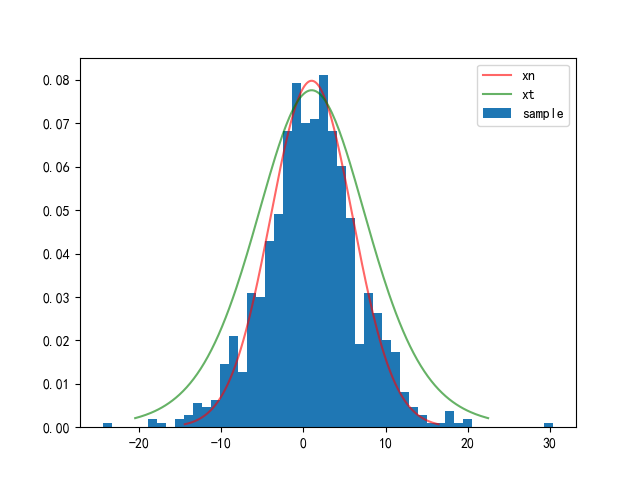

In [27]:
plt.figure()
xn_rvs=np.linspace(xn.ppf(.001),xn.ppf(.999),200)
plt.plot(xn_rvs,xn.pdf(xn_rvs),'r-',alpha=.6,label='xn')
xt_rvs=np.linspace(xt.ppf(.001),xt.ppf(.999),200)
plt.plot(xt_rvs,xt.pdf(xn_rvs),'g-',alpha=.6,label='xt')
plt.hist(x,bins=50,density=True,label='sample')
plt.legend()

# 卡方检验

In [28]:
qs=[0,.01,.05,.1,1-.1,1-.05,1-.01,1]
xt_crit=xt.ppf(qs)
x_freqcount=np.histogram(x,bins=xt_crit)[0]
xt_prob=np.diff(qs)
xn_prob=np.diff(xn.cdf(xt_crit))
# 卡方检验的原假设H0:样本的总体分布于理论分布无显著差异
xt_ch,xt_p=stats.chisquare(x_freqcount,xt_prob*n)
xn_ch,xn_p=stats.chisquare(x_freqcount,xn_prob*n)
print('chisquare for xt: chi2 = %6.2f pvalue = %6.4f' % (xt_ch, xt_p))
print('chisquare for xn: chi2 = %6.2f pvalue = %6.4f' % (xn_ch, xn_p))

chisquare for xt: chi2 =   6.53 pvalue = 0.3665
chisquare for xn: chi2 =  77.15 pvalue = 0.0000


得出：样本总体分布不服从正态分布

# 估计参数

In [29]:
t_df,t_loc,t_scale=stats.t.fit(x)
t_df,t_loc,t_scale

(8.533346991300498, 0.9457299761864943, 5.0794007337625136)

In [30]:
n_loc,n_scale=stats.norm.fit(x)
n_loc,n_scale

(0.9475118451452057, 5.8012521386384)

In [31]:
xt_prob=np.diff(stats.t(df=t_df,loc=t_loc,scale=t_scale).cdf(xt_crit))
xt_prob

array([0.01148862, 0.04264054, 0.05162503, 0.79173584, 0.05015458,
       0.04125137, 0.01110402])

In [32]:
xn_prob=np.diff(stats.norm(loc=n_loc,scale=n_scale).cdf(xt_crit))
xn_prob

array([0.00770279, 0.05040236, 0.06030713, 0.76672308, 0.05883178,
       0.04870541, 0.00732745])

In [33]:
# 卡方检验的原假设H0:样本的总体分布于理论分布无显著差异
xt_ch,xt_p=stats.chisquare(x_freqcount,xt_prob*n)
xn_ch,xn_p=stats.chisquare(x_freqcount,xn_prob*n)
print('chisquare for xt: chi2 = %6.2f pvalue = %6.4f' % (xt_ch, xt_p))
print('chisquare for xn: chi2 = %6.2f pvalue = %6.4f' % (xn_ch, xn_p))

chisquare for xt: chi2 =   4.36 pvalue = 0.6276
chisquare for xn: chi2 =   4.88 pvalue = 0.5589


得出：通过参数估计获得的t分布的假设要由于正态分布

# 正态分布的特殊测试
由于正态分布是统计学中最常见的分布，因此可以使用几个附加函数来测试样本是否可以从正态分布中抽取

首先，我们可以测试样本的偏斜和峰度与正态分布的偏差和峰度是否显着不同：

In [34]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))

normal skewtest teststat =  0.536 pvalue = 0.5921
normal kurtosistest teststat =  5.198 pvalue = 0.0000


In [35]:
# 正态性检验
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))

normaltest teststat = 27.311 pvalue = 0.0000


得出：p值非常低，我们可以拒绝我们的样本具有正态性假设。<br>
由于我们的样本的偏斜和峰度是基于中心矩，如果我们测试标准化样本，我们得到完全相同的结果：

In [36]:
print("normaltest teststat=%6.3f pvalue=%6.4f" % stats.normaltest((x-x.mean())/x.std()))

normaltest teststat=27.311 pvalue=0.0000


In [37]:
# 对一个正态分布样本做正态性检验
print("normaltest teststat=%6.3f pvalue=%6.4f" % stats.normaltest(stats.norm.rvs(size=n)))

normaltest teststat= 0.853 pvalue=0.6528


# 比较两个样本
stats.ttest_ind,检验原假设H0：两和样本具有相同的统计特性，即来自于同一个分布。

In [38]:
r1=stats.norm.rvs(size=n)
r2=stats.norm.rvs(size=n)
stats.ttest_ind(r1,r2)

Ttest_indResult(statistic=-2.197701102129991, pvalue=0.028084791662237523)

In [39]:
r1=stats.norm.rvs(size=n)
r2=stats.norm(loc=1).rvs(size=n)
stats.ttest_ind(r1,r2)

Ttest_indResult(statistic=-22.78389144418558, pvalue=2.4429474728021413e-102)

In [40]:
r1=stats.norm.rvs(size=n)
r2=stats.t(loc=1,df=10).rvs(size=n)
stats.ttest_ind(r1,r2)

Ttest_indResult(statistic=-21.322522649999616, pvalue=4.629876456049906e-91)

柯尔莫哥洛夫-斯米尔诺夫检验两个样本

In [41]:
r1=stats.norm.rvs(size=n)
r2=stats.norm.rvs(size=n)
stats.ks_2samp(r1,r2)

Ks_2sampResult(statistic=0.03700000000000003, pvalue=0.4931126807674715)

In [42]:
r1=stats.norm.rvs(size=n)
r2=stats.norm(loc=10).rvs(size=n)
stats.ks_2samp(r1,r2)

Ks_2sampResult(statistic=1.0, pvalue=0.0)

# stats方法清单

<IPython.core.display.Javascript object>


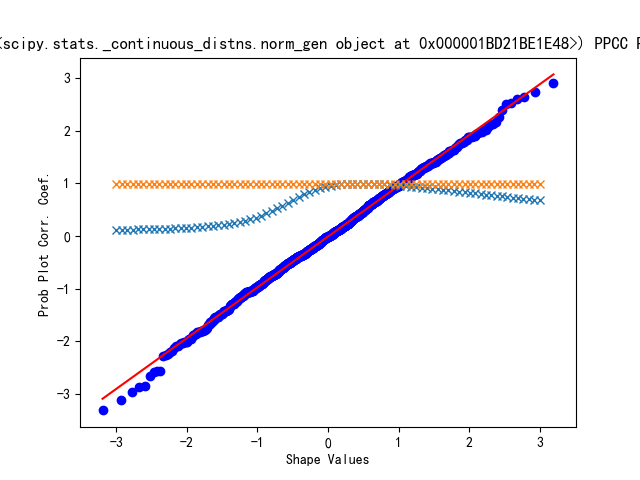

In [43]:
from numpy import random
nsample=1000
data=stats.norm.rvs(size=nsample)
stats.norm.rvs(loc=0,scale=1,size=10,random_state=None)     # 生成随机数
stats.norm.pdf(-1.96,loc=0,scale=1)                         # 密度分布函数，画密度分布图时使用
stats.norm.cdf(-1.96,loc=0,scale=1)                         # 累计分布函数，-1.96对应2.5%
stats.norm.sf(-1.96,loc=0,scale=1)                          # 残存函数(=1-cdf)，-1.96对应97.5%
stats.norm.ppf(0.025,loc=0,scale=1)                         # 累计分布函数反过来
stats.norm.isf(0.975,loc=0,scale=1)                         # 残存函数反过来
stats.norm.interval(0.95,loc=0,scale=1)                     # 置信度为95%的置信区间
stats.norm.moment(n=2,loc=0,scale=1)                        # n阶中心距，n=2时是方差
stats.norm.median(loc=0,scale=1)                            # Median of the distribution.
stats.norm.mean(loc=0,scale=1)                              # Mean of the distribution.
stats.norm.var(loc=0,scale=1)                               # Variance of the distribution.
stats.norm.std(loc=0,scale=1)                               # Standard deviation of the distribution.
stats.norm.fit(data)                                        # fit 估计潜在分布的参数

# Statistical functions
stats.describe([1,2,3])                                     # 返回多个统计量
stats.gmean([1,2,4])                                        # 几何平均数 n-th root of (x1 * x2 * ... * xn)
stats.hmean([2,2,2])                                        # 调和平均数 n / (1/x1 + 1/x2 + ... + 1/xn)
stats.trim_mean([1,2,3,5],0.25)                             # 砍头去尾均值，按比例砍
stats.sem(data)                                             # Calculates the standard error of the mean
stats.mode([1,1,2])                                         # 众数
stats.skew(data)                                            # 偏度
stats.kurtosis(data)                                        # 峰度
stats.moment(data,moment=3)                                 # n阶中心矩，3阶就是偏度，4阶就是峰度
stats.skewtest(data)                                        # 检验偏度是否符合正态分布的偏度
stats.kurtosistest(data)                                    # 检验峰度是否符合正态分布的峰度
stats.normaltest(data)                                      # 检验是否符合正态分布
stats.variation([1,2,3])                                    # 变异系数(=std/mean*100%)
stats.find_repeats([1,1,2,2,3])                             # 重复值查找

np.unique([1,1,2,2,3])                                                  # 频次统计
stats.percentileofscore([1,2,3,4,5],2)                                  # 返回数值的分位数
stats.scoreatpercentile([1,2,3,4,5],80,interpolation_method="lower")    # 返回分位数对应的数值

stats.bayes_mvs(data)                                       # 返回均值/方差/标准差的贝叶斯置信区间

stats.iqr([1,2,3,4,5],rng=(25,75))                          # 计算 IQR
stats.zscore(data)                                          # 计算 zscore
stats.f_oneway(data,data+data,data+data+data)               # 单因素方差分析，参数是(样本组1,样本组2,样本组3)
stats.pearsonr(data,data+data)                              # 皮尔森相关系数
stats.spearmanr(data,data+data)                             # 斯皮尔曼秩相关系数
stats.kendalltau(data,data+data)                            # 肯德尔相关系数
stats.pointbiserialr([1,1,1,0,0,0],[1,2,3,4,5,6])           # 点二系列相关，第一个变量需要是二分类变量
stats.linregress(data,data+data)                            # 线性最小二乘回归

stats.ttest_1samp(data,popmean=0)                           # 单样本 t-检验: 检验总体平均数的值
stats.ttest_ind(data,data+data)                             # 双样本 t-检验: 检验不同总体的差异
stats.ttest_rel(data,data+data)                             # 配对样本 t-检验
stats.ttest_ind_from_stats(mean1=0,std1=1,
                           nobs1=100,mean2=10,
                           std2=1,nobs2=150,equal_var=True) # 根据统计量做 t-检验
stats.wilcoxon(data,data+data)                              # 一种非参数的配对样本检验。t-检验假定高斯误差。可以使用威尔科克森符号秩检验, 放松了这个假设
stats.kstest(data,'norm')                                   # Kolmogorov–Smirnov检验: 检验单一样本是否服从某一预先假设的特定分布
stats.ks_2samp(data,data+data)                              # 检测两样本分布是否相同
stats.ranksums(data,data+data)                              # Wilcoxon rank-sum statistic 检测两样本分布是否相同
stats.chisquare(data,data)                                  # 卡方检验，第一个参数是样本分布，第二个参数是期望分布

# Circular statistical functions
# 适用于环形数据，如时间(60分钟一圈)，角度(360度一圈)
# 例如 0度 与 360度 的均值应该是 0度
stats.circmean([0,360],high=0,low=360)      # 均值
stats.circvar([0,360],high=0,low=360)       # 方差
stats.circstd([0,360],high=0,low=360)       # 标准差

# Contingency table functions
# 列联表
stats.chi2_contingency([[10,10,20],[20,20,20]],lambda_="log-likelihood")        # 卡方检验，n*m的列联表，每个格子样本数要大于5，lambda_默认皮尔森
stats.fisher_exact([[8,2],[1,5]],alternative="two-sided")                       # 费舍尔精确检验，2*2的列联表，alternative:two-sided,less,greater
stats.contingency.expected_freq([[10,10,20],[20,20,20]])                        # 返回列联表的期望频次(各变量独立时的预期频次)
import numpy as np; stats.contingency.margins(np.array([[10,10,20],[20,20,20]]))# 返回列联表的行列和

# Plot-tests
# 图检验：probplot与Q-Q图的差异：P-P图是用分布的累计比，而Q-Q图用的是分布的分位数来做检验
plt.figure()
stats.probplot(data,dist=stats.norm,sparams=(0,1),plot=plt) # P-P图(probability plot)，参数sparams传的是均值与标准差
stats.boxcox_normplot(abs(data),-3,3,plot=plt)              # 不知干啥用，Compute parameters for a Box-Cox normality plot
stats.ppcc_plot(data,-3,3,dist=stats.norm,plot=plt)         # 不知干啥用，Calculate and optionally plot probability plot correlation coefficient.
stats.ppcc_max(data,dist=stats.norm)                        # 不知干啥用，返回 PPCC 取最大时对应的位置

# Univariate and multivariate kernel density estimation
# 核密度估计用于估计未知的密度函数，属於非参数检验方法之一
stats.gaussian_kde([data,data+random.normal(size=nsample)])     # 不知干啥用，Representation of a kernel-density estimate using Gaussian kernels.
s=""" ---------------------------------------------------------------------------------------------------------
所有分布都是 rv_continuous(连续型分布) 与 rv_discrete(离散型分布) 的实例
rv_continuous([momtype, a, b, xtol, ...])   A generic continuous random variable class meant for subclassing.
rv_discrete([a, b, name, badvalue, ...])    A generic discrete random variable class meant for subclassing.
rv_histogram(histogram, *args, **kwargs)    Generates a distribution given by a histogram.

Continuous distributions 连续型分布
alpha   An alpha continuous random variable.
beta    A beta continuous random variable.
chi2    A chi-squared continuous random variable.
f       An F continuous random variable.
gamma   A gamma continuous random variable.
lognorm A lognormal continuous random variable.
ncx2    A non-central chi-squared continuous random variable.
ncf     A non-central F distribution continuous random variable.
nct     A non-central Student’s T continuous random variable.
norm    A normal continuous random variable.
pareto  A Pareto continuous random variable.
t       A Student’s T continuous random variable.
uniform A uniform continuous random variable.
wald    A Wald continuous random variable.
……

Multivariate distributions 多元分布
multivariate_normal A multivariate normal random variable.
matrix_normal       A matrix normal random variable.
multinomial         A multinomial random variable.
random_correlation  A random correlation matrix.
……

Discrete distributions 离散型分布
binom       A binomial discrete random variable.
hypergeom   A hypergeometric discrete random variable.
nbinom      A negative binomial discrete random variable.
poisson     A Poisson discrete random variable.
randint     A uniform discrete random variable.
""" 

# 案例

In [44]:
import tushare as ts
ts.set_token('c5e635f32d3b7a8f1168362b0ca87988454155e835a5fd9ce5b43e38')
tp= ts.pro_api()

[tushare注册链接](https://tushare.pro/register?reg=129557)

In [45]:
data=tp.index_daily(ts_code='399300.SZ',start_date='2015-01-01')
data.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_change,vol,amount
0,399300.SZ,20181012,3170.7262,3123.3715,3184.1220,3094.9657,3124.1139,46.6123,1.4920,98611151.0,104423076.6
1,399300.SZ,20181011,3124.1139,3179.5408,3209.5202,3099.0402,3281.5978,-157.4839,-4.7990,120941342.0,125723084.4
2,399300.SZ,20181010,3281.5978,3295.4288,3315.7310,3256.5815,3288.6906,-7.0928,-0.2157,64492828.0,79166808.5
3,399300.SZ,20181009,3288.6906,3290.1705,3309.7978,3276.1322,3290.8988,-2.2082,-0.0671,66723274.0,78372941.3
4,399300.SZ,20181008,3290.8988,3361.5594,3364.4641,3285.2530,3438.8649,-147.9661,-4.3028,97888989.0,114164218.3


In [46]:
r=data['pct_change']/100
r.head()

0    0.014920
1   -0.047990
2   -0.002157
3   -0.000671
4   -0.043028
Name: pct_change, dtype: float64

<IPython.core.display.Javascript object>


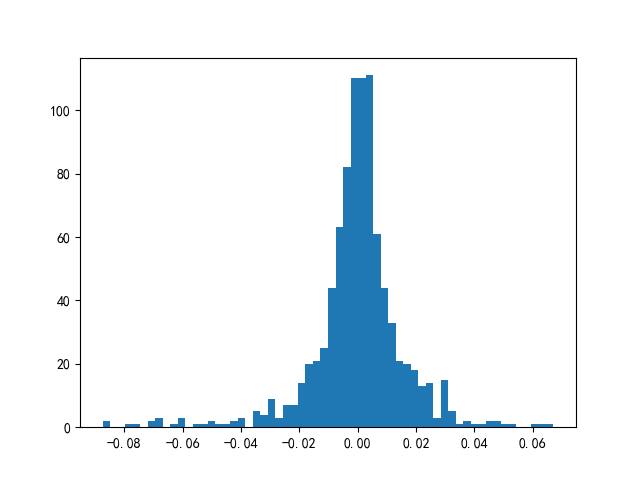

(array([  2.,   0.,   0.,   1.,   1.,   0.,   2.,   3.,   0.,   1.,   3.,
          0.,   1.,   1.,   2.,   1.,   1.,   2.,   3.,   0.,   5.,   4.,
          9.,   3.,   7.,   7.,  14.,  20.,  21.,  25.,  44.,  63.,  82.,
        110., 110., 111.,  61.,  44.,  33.,  21.,  20.,  18.,  13.,  14.,
          3.,  15.,   5.,   1.,   2.,   1.,   1.,   2.,   2.,   1.,   1.,
          0.,   0.,   1.,   1.,   1.]),
 array([-0.087477  , -0.08489993, -0.08232287, -0.0797458 , -0.07716873,
        -0.07459167, -0.0720146 , -0.06943753, -0.06686047, -0.0642834 ,
        -0.06170633, -0.05912927, -0.0565522 , -0.05397513, -0.05139807,
        -0.048821  , -0.04624393, -0.04366687, -0.0410898 , -0.03851273,
        -0.03593567, -0.0333586 , -0.03078153, -0.02820447, -0.0256274 ,
        -0.02305033, -0.02047327, -0.0178962 , -0.01531913, -0.01274207,
        -0.010165  , -0.00758793, -0.00501087, -0.0024338 ,  0.00014327,
         0.00272033,  0.0052974 ,  0.00787447,  0.01045153,  0.0130286 ,
      

In [47]:
# 绘制样本直方图
plt.figure()
plt.hist(r,bins=60)

In [48]:
# 获得样本的统计值
rd=stats.describe(r)
rd

DescribeResult(nobs=920, minmax=(-0.087477, 0.067147), mean=1.4254347826087002e-05, variance=0.00026126912498637933, skewness=-1.008027783966825, kurtosis=5.990397770739195)

In [49]:
# 对样本进行t检验
stats.ttest_1samp(r,rd.mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

估计样本为t分布时候的参数,以及ks检验

In [50]:
stats.t.fit(r)

(1.984236762575577, 1.5193615850693831e-05, 0.0077991853956134675)

In [51]:
stats.kstest(r,'t',stats.t.fit(r))

KstestResult(statistic=0.042292649113312375, pvalue=0.07231502685175273)

估计样本为norm分布时候的参数,以及ks检验

In [52]:
stats.norm.fit(r)

(1.4254347826087002e-05, 0.016155034410580693)

In [53]:
stats.kstest(r,'norm',stats.norm.fit(r))

KstestResult(statistic=0.12550777532633198, pvalue=4.3209880118411093e-13)

得出：明确拒绝原假设H0：样本服从正态分布

In [54]:
# 通过正态分布的特殊检验，也得到了ks检验的相同结论
stats.normaltest(r)

NormaltestResult(statistic=236.8916145796153, pvalue=3.6277678648758676e-52)

卡方检验

In [55]:
qs=[0,.01,.05,.1,1-.1,1-.05,1-.01,1]
rt=stats.t.fit(r)
xt=stats.t(df=rt[0],loc=rt[1],scale=rt[2])
r_crit=xt.ppf(qs)
x_freqcount=np.histogram(r,bins=r_crit)[0]
xt_prob=np.diff(qs)
# 卡方检验的原假设H0:样本的总体分布于理论分布无显著差异
xt_ch,xt_p=stats.chisquare(x_freqcount,xt_prob*rd.nobs)
print('chisquare for xt: chi2 = %6.2f pvalue = %6.4f' % (xt_ch, xt_p))

chisquare for xt: chi2 =  11.16 pvalue = 0.0836


# 核密度估计

In [56]:
kde=stats.gaussian_kde(r)

# 绘制不同估计分布的概率密度曲线

<IPython.core.display.Javascript object>


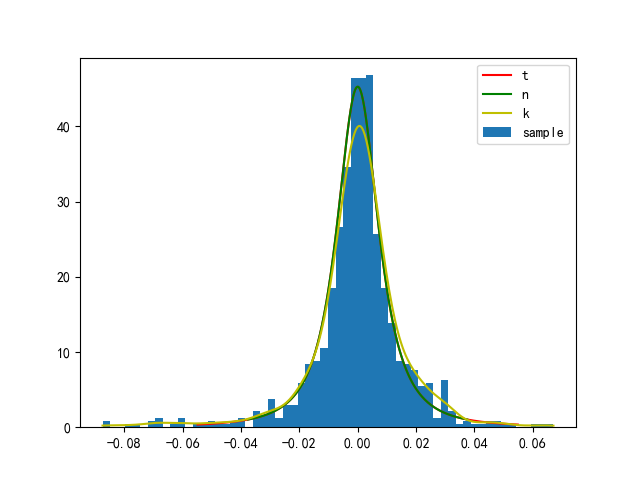

In [57]:
nsample=300
plt.figure()
rt=stats.t.fit(r)
t=stats.t(df=rt[0],loc=rt[1],scale=rt[2])
t_rvs=np.linspace(t.ppf(.01),t.ppf(.99),nsample)
plt.plot(t_rvs,t.pdf(t_rvs),'r-',label='t')

rn=stats.norm.fit(r)
n=stats.norm(loc=rn[0],scale=rn[1])
n_rvs=np.linspace(n.ppf(.01),n.ppf(.99),nsample)
plt.plot(n_rvs,t.pdf(n_rvs),'g-',label='n')

k_rvs=np.linspace(r.min(),r.max(),nsample)
plt.plot(k_rvs,kde.pdf(k_rvs),'y-',label='k')

plt.hist(r,bins=60,density=True,label='sample')
plt.legend()